# Food Data Visualisation

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re

%matplotlib inline

Importing Data

In [2]:
df = pd.read_csv("food_imported_data.csv")
df['date_of_fail'] = pd.to_datetime(df['date_of_fail'], errors = 'coerce')
df.head()

,Unnamed: 0,date_of_fail,product_description,country_of_origin,producer_name,reason_for_fail,results,units,reference,food_category,test_applied,holding_order_number,category,result/s,category,test_applied/_reason_for_fail,results/units,results_/_units.1,result,results_in_mg_per_kg
0,0,2019-06-05,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,125.0,g,SPI 06/2019,Risk,Not Applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250000.0
1,1,2019-06-11,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk,Not Applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-06-13,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,125.0,g,SES 05/2014,Risk,Not Applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250000.0
3,3,2019-06-17,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,NaN,cfu/g,CRU 03/2019,Risk,Not Applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-06-14,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,125.0,g,MSM 11/2018,Risk,Not Applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     1609 non-null   int64         
 1   date_of_fail                   1609 non-null   datetime64[ns]
 2   product_description            1531 non-null   object        
 3   country_of_origin              1528 non-null   object        
 4   producer_name                  1528 non-null   object        
 5   reason_for_fail                1434 non-null   object        
 6   results                        563 non-null    float64       
 7   units                          1581 non-null   object        
 8   reference                      1529 non-null   object        
 9   food_category                  1551 non-null   object        
 10  test_applied                   1609 non-null   object        
 11  holding_order_num

Function

In [4]:
# NOTE (changing the fontsize):
# changing the fontsize of yticks or xticks fontsize
# Link : https://www.geeksforgeeks.org/how-to-set-tick-labels-font-size-in-matplotlib/
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# NOTE (Bar Label):
# bar label https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

# fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
# fruit_counts = [4000, 2000, 7000]

# fig, ax = plt.subplots()
# bar_container = ax.bar(fruit_names, fruit_counts)
# ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
# ax.bar_label(bar_container, fmt='{:,.0f}')

def null_proof(data, column1, column2):
    new_data = data[(data[column1].notnull()) & (data[column2].notnull())]
    return new_data

def group_agg_bar_plot(data, 
                       category, 
                       number, 
                       agg, 
                       xlabel = "", 
                       ylabel = "", 
                       title = "", 
                       xticksfontsize = 25, 
                       yticksfontsize = 25,
                       titlefontsize = 30):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg(agg))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (15,15))

    bar = plt.bar(x = cat_list, height= num_list)
    plt.bar_label(bar, label_type='edge', fontsize=22)
    plt.xticks(fontsize = xticksfontsize)
    plt.yticks(fontsize = yticksfontsize)
    plt.xlabel(f"{xlabel}", fontsize = 25)
    plt.ylabel(f"{ylabel}", fontsize = 25)
    plt.title(f"{title}", fontsize = titlefontsize)
    plt.show();
    
def group_agg_horizontal_bar_plot(data, 
                                  category, 
                                  number, 
                                  agg, 
                                  xlabel = "",
                                  xlabelfontsize = 15,
                                  ylabel = "", 
                                  title = "",
                                  xticksfontsize = 25, 
                                  yticksfontsize = 25,
                                  titlefontsize = 30):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg(agg))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (15,15))

    bar = plt.barh(y = cat_list, width= num_list)
    plt.bar_label(bar, label_type='edge', fontsize=22)
    plt.yticks(fontsize = yticksfontsize)
    plt.xticks(fontsize = xticksfontsize)
    plt.xlabel(f"{xlabel}", fontsize = xlabelfontsize)
    plt.title(f"{title}", fontsize = titlefontsize)
    plt.show();
    
    
def group_agg_pie(data, 
                   category, 
                   number):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg('count'))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (5,5))

    plt.pie(x = num_list, labels = cat_list, autopct = '%1.1f%%')
    
    
def value_count_plot_bar(data, column, xlabel = "", title = "", fig_width = 10, fig_height = 10):
    value_count_dict = dict(data[column].value_counts())
    label = []
    value = []

    for k, v in value_count_dict.items():
        label.append(k)
        value.append(v)
        if len(label) == 25:
            break

    ticks = list(range(0, len(label)))
    fig, ax = plt.subplots(figsize = (fig_width,fig_height))
    ax.barh(y = ticks, width = value)
    ax.set_yticks(ticks)
    ax.set_yticklabels(label)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show();
    
def get_year_value_count(date_col):
    year_value = dict(date_col.dt.year.value_counts())
    year_value_tup = []
    for k,v in year_value.items():
        year_value_tup.append((str(k),v))
    year_value_tup_sorted = sorted(year_value_tup, key = lambda tup:tup[0])
    return year_value_tup_sorted

def get_labels_vals(date_col):
    year_val_count = get_year_value_count(date_col)
    labels = []
    vals = []
    for i in year_val_count:
        labels.append(i[0])
        vals.append(i[1])
    return labels, vals

def line_plot(date_col, xlabel = "", ylabel = "", title = "", label = ""):
    labels, vals = get_labels_vals(date_col)
    line_plot = sns.lineplot(x = labels, y = vals, label = label)
    line_plot.set_xlabel(xlabel)
    line_plot.set_ylabel(ylabel)
    line_plot.set_title(title)
    
    
def get_common_results(column, top_n = 0):
    val_count_dict = dict(column.value_counts())
    labels = []
    vals = []
    for k, v in val_count_dict.items():
        labels.append(k)
        vals.append(v)
        if len(labels) == top_n:
            break
    return labels, vals

def bar_plot_val_count(column, top_n = 0, xlabel = "", ylabel = "", title = ""):
    labels, vals = get_common_results(column, top_n)
    ticks = list(range(len(labels)))
    barplot = sns.barplot(x = ticks, y = vals)
    barplot.set_xticklabels(labels, rotation = 90)
    barplot.set_xlabel(xlabel)
    barplot.set_ylabel(ylabel)
    barplot.set_title(title)

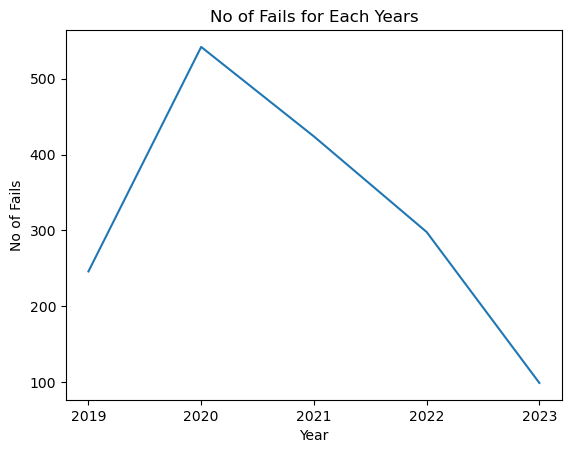

In [5]:
line_plot(df['date_of_fail'], xlabel = "Year", ylabel = "No of Fails", title = "No of Fails for Each Years")

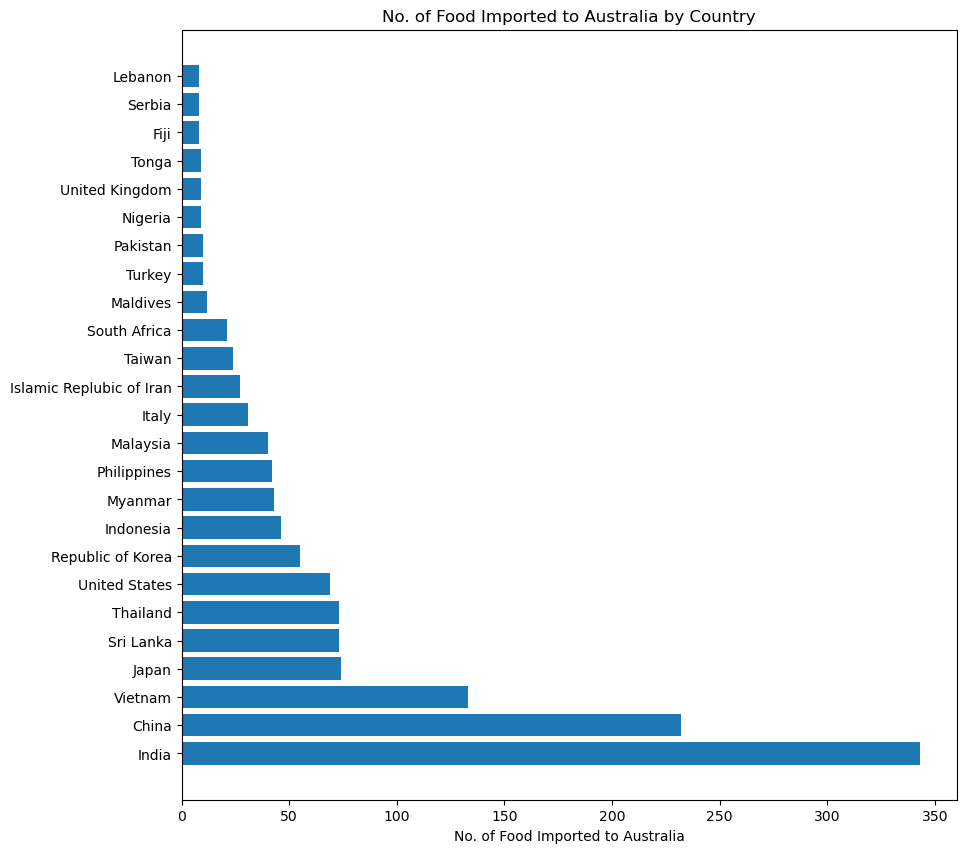

In [6]:
value_count_plot_bar(df, 
                     'country_of_origin', 
                     xlabel = "No. of Food Imported to Australia", 
                     title = "No. of Food Imported to Australia by Country")

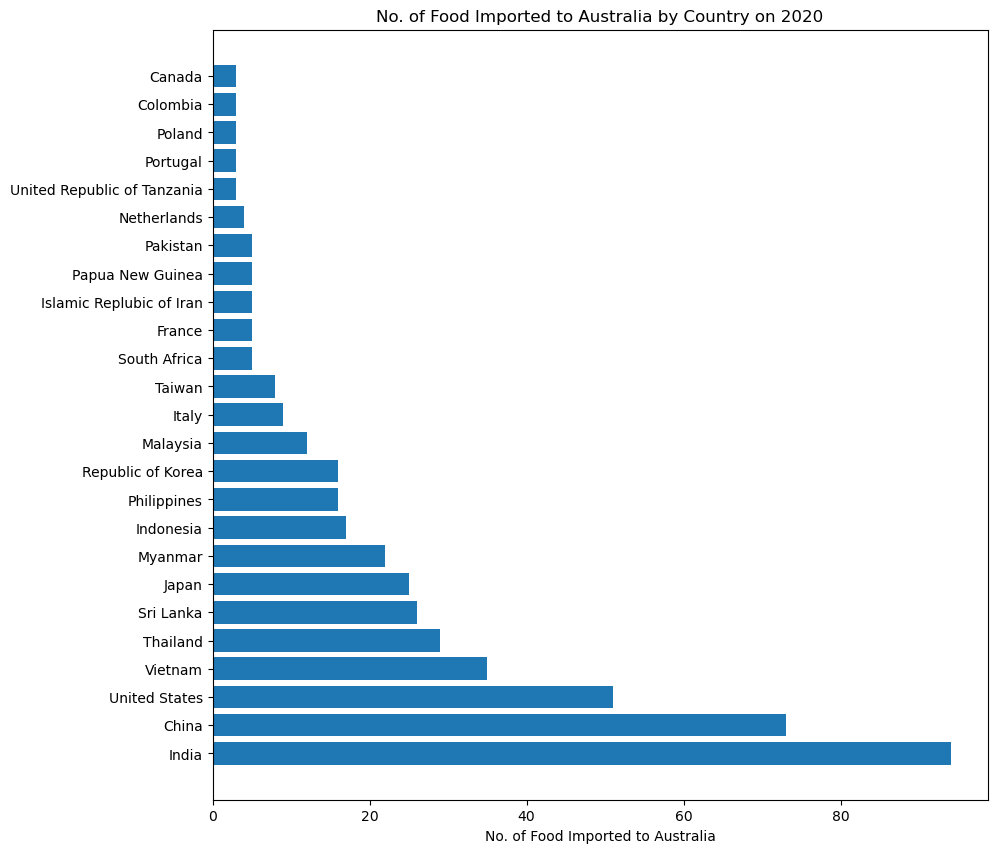

In [7]:
value_count_plot_bar(df.loc[df['date_of_fail'].dt.year == 2020], 
                     'country_of_origin', 
                     xlabel = "No. of Food Imported to Australia", 
                     title = "No. of Food Imported to Australia by Country on 2020")

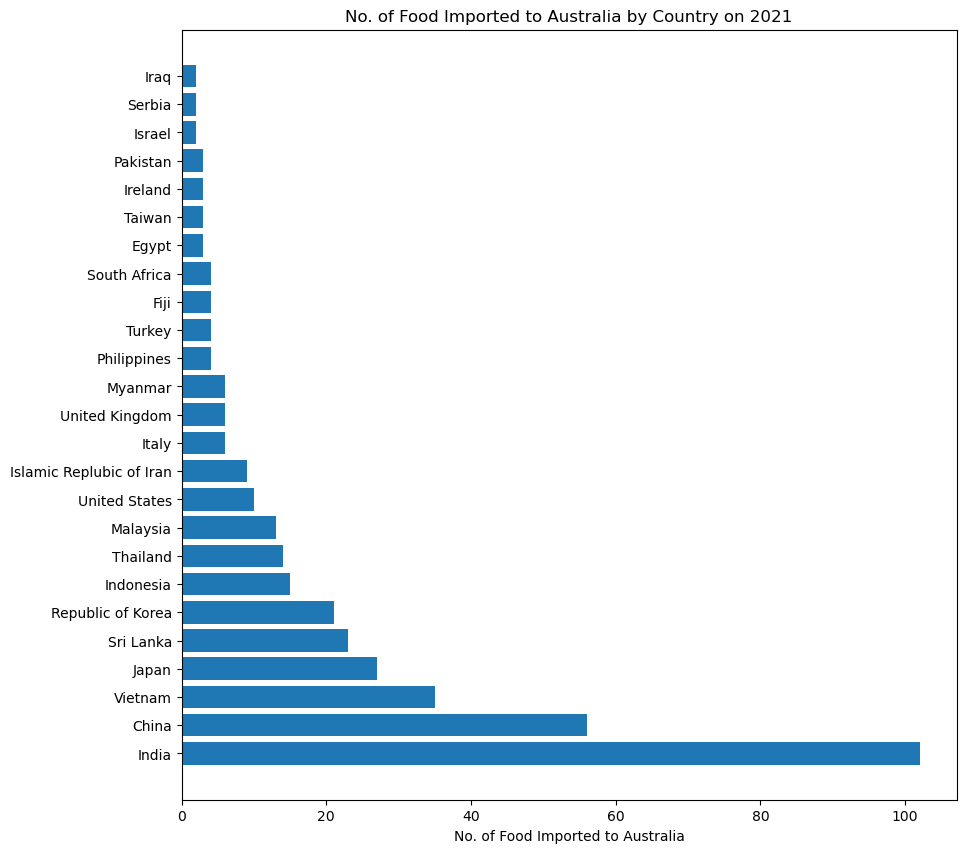

In [8]:
value_count_plot_bar(df.loc[df['date_of_fail'].dt.year == 2021], 
                     'country_of_origin', 
                     xlabel = "No. of Food Imported to Australia", 
                     title = "No. of Food Imported to Australia by Country on 2021")

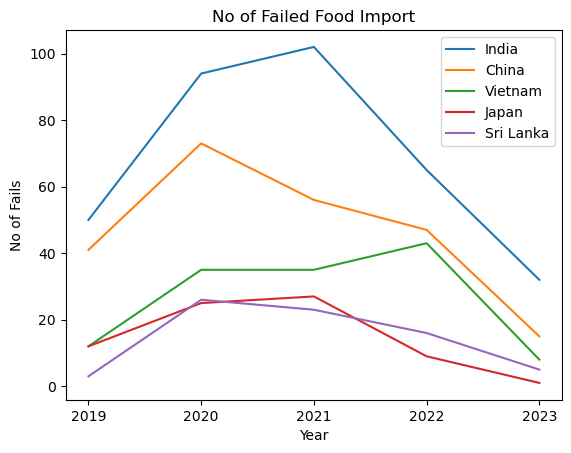

In [9]:
labels, values = get_common_results(df['country_of_origin'], 5)

for label in labels:
    country_df = df.loc[df['country_of_origin'] == label]
    line_plot(country_df['date_of_fail'], xlabel = "Year", ylabel = "No of Fails", title = f"No of Failed Food Import", label = label)

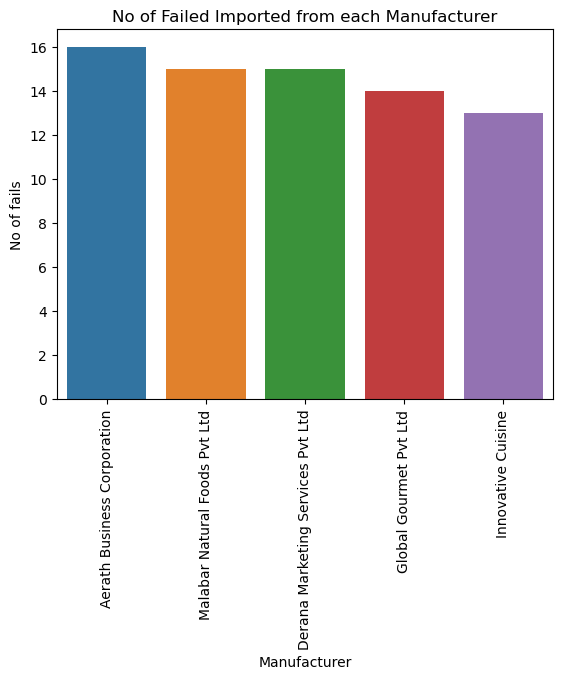

In [10]:
bar_plot_val_count(df['producer_name'], 5, "Manufacturer", "No of fails", "No of Failed Imported from each Manufacturer")

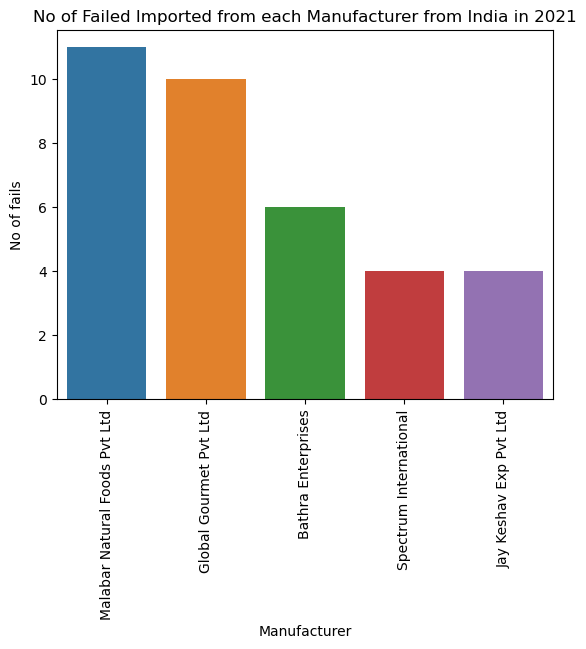

In [11]:
india_2020_df = df.loc[(df['country_of_origin'] == "India") & (df['date_of_fail'].dt.year == 2020)]
bar_plot_val_count(india_2020_df['producer_name'], 5, "Manufacturer", "No of fails", "No of Failed Imported from each Manufacturer from India in 2021")

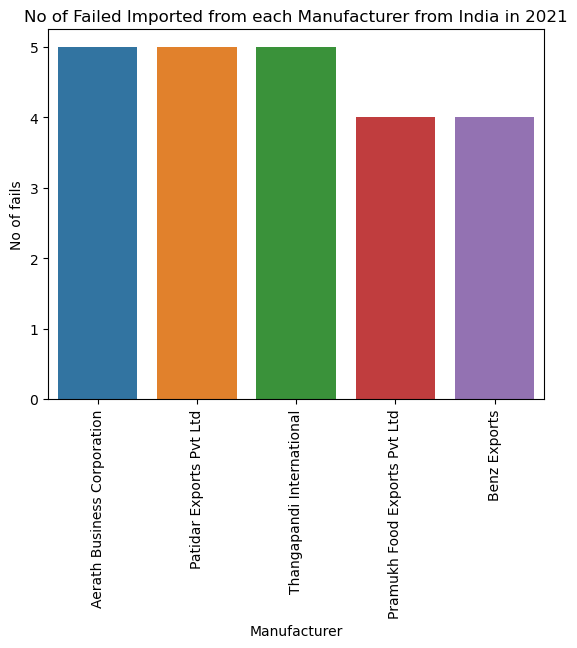

In [12]:
india_2021_df = df.loc[(df['country_of_origin'] == "India") & (df['date_of_fail'].dt.year == 2021)]
bar_plot_val_count(india_2021_df['producer_name'], 5, "Manufacturer", "No of fails", "No of Failed Imported from each Manufacturer from India in 2021")

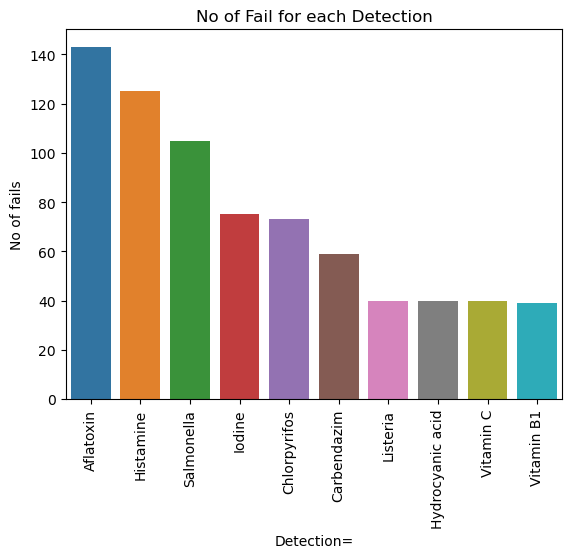

In [13]:
bar_plot_val_count(df['reason_for_fail'], 10, "Detection=", "No of fails", "No of Fail for each Detection")

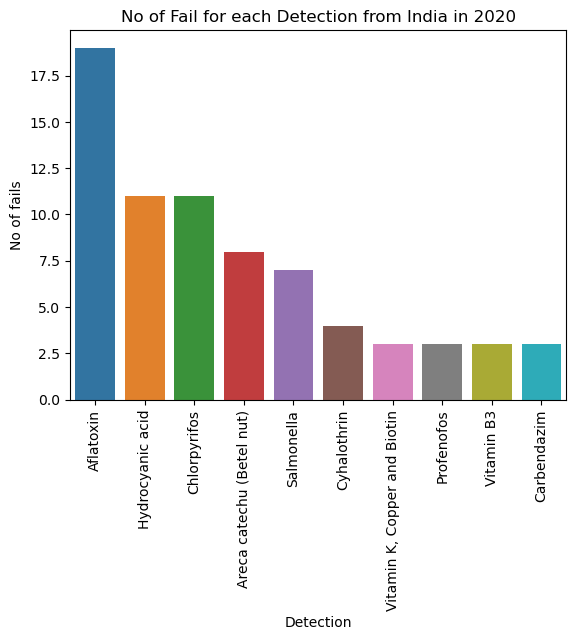

In [14]:
bar_plot_val_count(india_2020_df['reason_for_fail'], 10, "Detection", "No of fails", "No of Fail for each Detection from India in 2020")

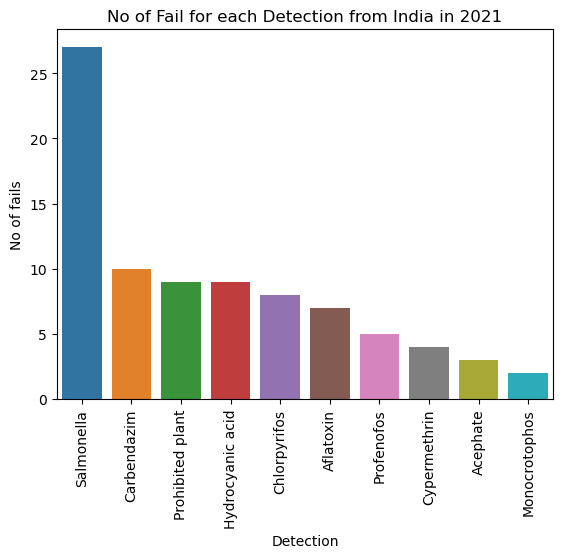

In [15]:
bar_plot_val_count(india_2021_df['reason_for_fail'], 10, "Detection", "No of fails", "No of Fail for each Detection from India in 2021")